In [1]:
%pylab inline
import pandas as pd



Populating the interactive namespace from numpy and matplotlib


In [6]:
%ls  -lrth AllEvtsOldPres | grep -v npz | tail

total 19G
drwxr-xr-x 2 laurent laurent  32K juin  26 17:35 Fitters/
-rw-r--r-- 1 laurent laurent 719K juin  26 17:55 0626_dfscores_100k.txt
-rw-r--r-- 1 laurent laurent 943K juin  26 17:55 0626_dfscores100k.txt
-rw-r--r-- 1 laurent laurent  32K juin  26 17:55 0626_i_test_tt_30files.npy


In [2]:
dfSGD=pd.read_csv("AllEvtsOldPres/0626_dfscores_100k.txt", names=["pseudoindex", "nvar", "nsamp", "score", "time", "alpha", "fitter"])
dfSGD=dfSGD.groupby("pseudoindex").last()
dfSGD.head()

,nvar,nsamp,score,time,alpha,fitter
pseudoindex,,,,,,
0,158,100,0.600485,0.159862,4.832930,SGD
1,158,158,0.586543,0.213641,0.784760,SGD
2,100,251,0.608302,0.205719,2.636651,SGD
3,158,251,0.606111,0.243589,1.438450,SGD
4,251,100,0.567762,0.202171,0.020691,SGD


In [3]:
dfRidge=pd.read_csv("AllEvtsOldPres/0626_dfscores100k.txt", names=["pseudoindex", "nvar", "nsamp", "score", "time", "alpha"])
dfRidge["fitter"]="Ridge"
dfRidge=dfRidge.groupby("pseudoindex").last()
dfRidge.head()

,nvar,nsamp,score,time,alpha,fitter
pseudoindex,,,,,,
0,100,100,0.554915,0.050175,1.615598e+02,Ridge
1,100,158,0.597834,0.055004,1.000000e+07,Ridge
2,158,100,0.570775,0.027465,2.610157e+02,Ridge
3,158,158,0.608117,0.028611,1.000000e+07,Ridge
4,100,251,0.606513,0.024629,5.108970e+04,Ridge


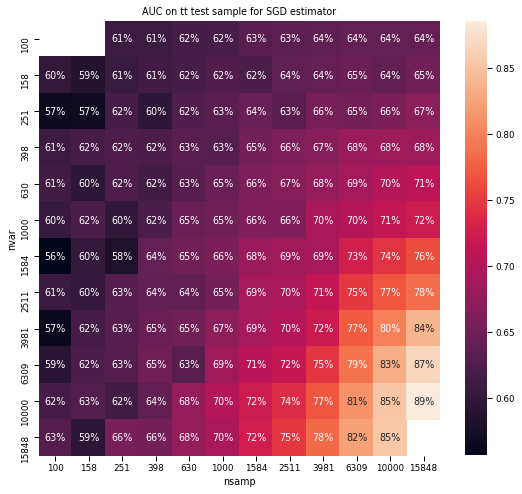

In [12]:
import seaborn as sns
sns.set_context("paper")
figsize(9, 8)
dfpiv=dfSGD[["nvar", "nsamp", "score"]].pivot("nvar", "nsamp", "score")
sns.heatmap(dfpiv, annot=True, fmt=".0%")
title("AUC on tt test sample for SGD estimator")
savefig("SGD_tt_2dfit")

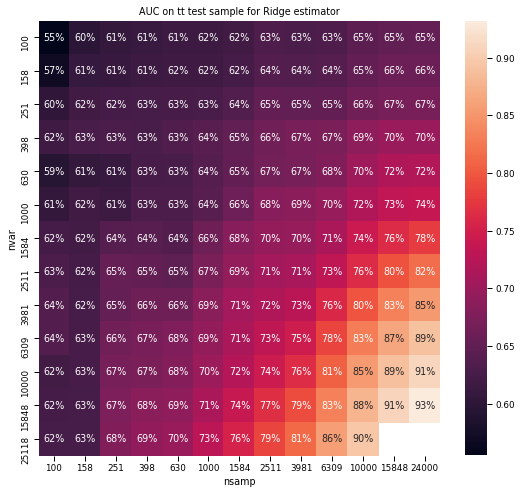

In [13]:
import seaborn as sns
figsize(9, 8)
dfpiv=dfRidge[["nvar", "nsamp", "score"]].pivot("nvar", "nsamp", "score")
sns.heatmap(dfpiv, annot=True, fmt=".0%")
title("AUC on tt test sample for Ridge estimator")
savefig("Ridge_tt_2dfit")

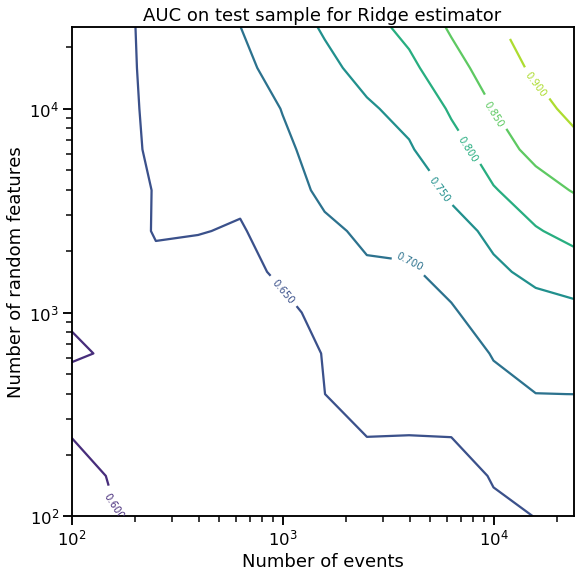

In [14]:
sns.set_context("talk")
figsize(9, 9)
CS=contour(dfRidge.nsamp.unique(), dfRidge.nvar.unique(), dfRidge[["nvar", "nsamp", "score"]].pivot("nvar", "nsamp", "score"))
xscale("log")
yscale("log")
clabel(CS, inline=1, fontsize=10)
xlabel("Number of events")
ylabel("Number of random features")
title("AUC on test sample for Ridge estimator")

savefig("Ridge_tt_contour")

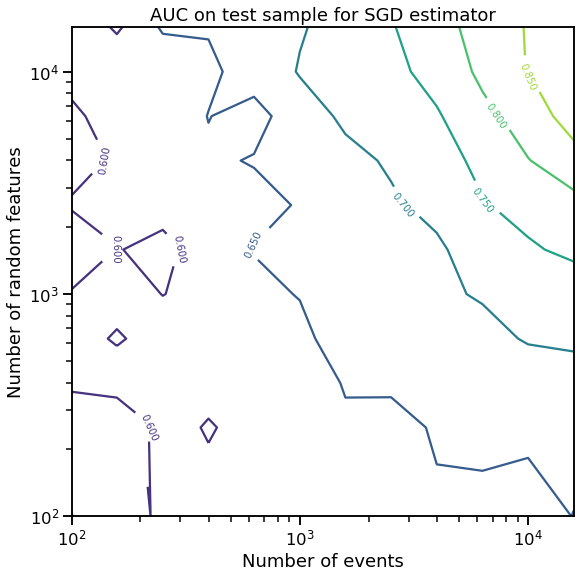

In [15]:
sns.set_context("talk")
figsize(9, 9)
CS=contour(dfSGD.nsamp.unique(), dfSGD.nvar.unique(), dfSGD[["nvar", "nsamp", "score"]].pivot("nvar", "nsamp", "score"))
xscale("log")
yscale("log")
clabel(CS, inline=1, fontsize=10)
xlabel("Number of events")
ylabel("Number of random features")
title("AUC on test sample for SGD estimator")
savefig("SGD_tt_contour")

Text(0.5, 1.0, 'Ridge AUC')

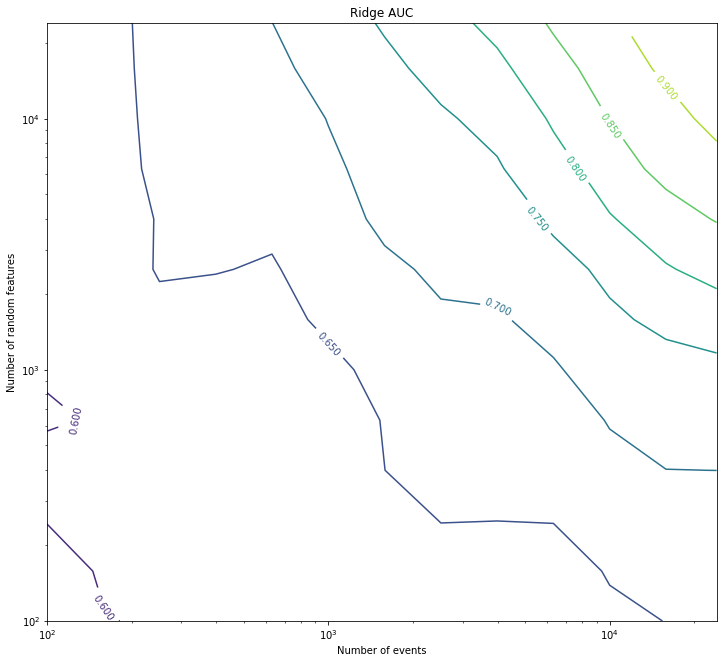

In [35]:
CS=contour(dfRidge.nsamp.unique(), dfRidge.nsamp.unique(), dfpiv)
xscale("log")
yscale("log")
clabel(CS, inline=1, fontsize=10)
xlabel("Number of events")
ylabel("Number of random features")
title("Ridge AUC")

,nvar,nsamp,score
0,100,100,0.517180
1,158,100,0.520804
2,251,100,0.529552
3,398,100,0.557052
4,630,100,0.540416


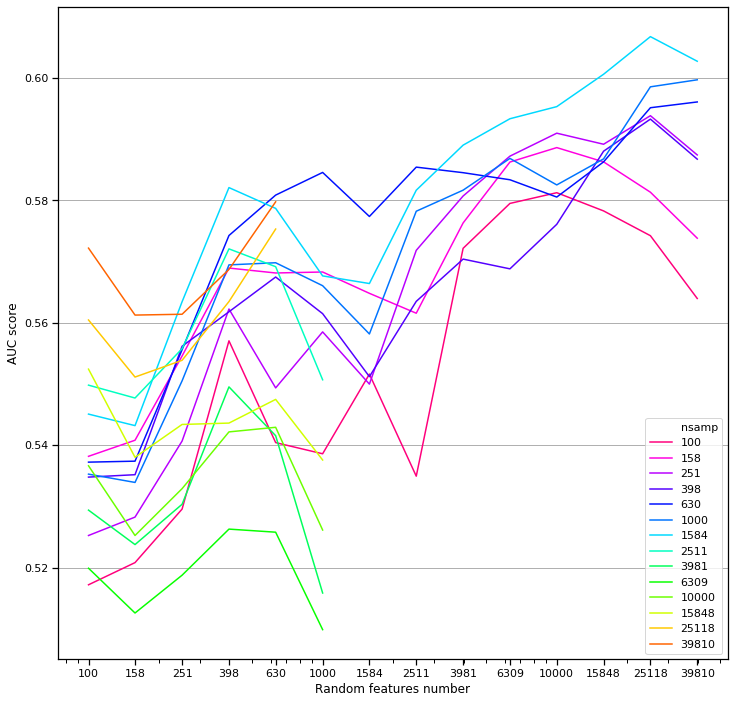

In [11]:
figsize(12, 12)

ncol=len(dfscore.nsamp.unique())

ax=sns.lineplot(data=dfscore, x="nvar", y="score", 
                hue="nsamp", markers=True, legend="full",
                palette=sns.color_palette("hsv_r", ncol))
#sns.lineplot(data=dfscore, x="nvar", y="score", hue="fitter", markers=True)


xlabel("Random features number")
xscale("log")
xticks(dfscore.nvar.unique())
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ylabel("AUC score")
grid(axis="y")
#ylim(0.55, 0.71)

dfscore.head()

14

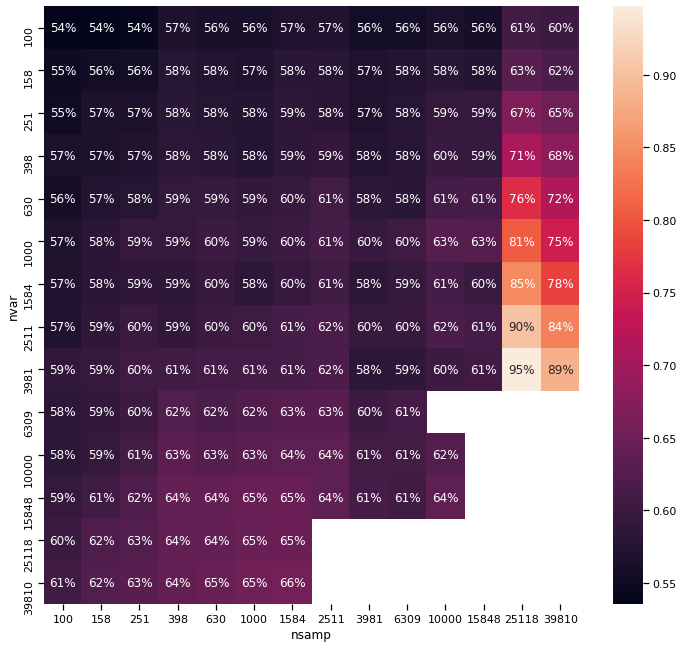

In [16]:
figsize(12, 11)
dfpiv=dfscore[["nvar", "nsamp", "score"]].pivot("nvar", "nsamp", "score")
sns.heatmap(dfpiv, annot=True, fmt=".0%")

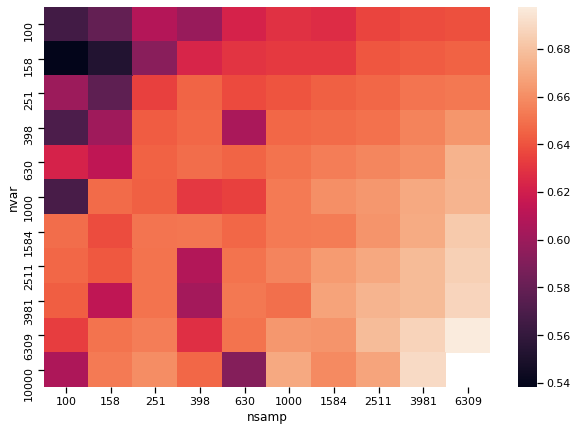

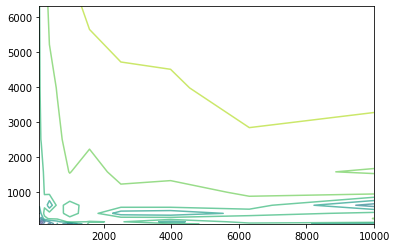

In [6]:
X=dfpiv.columns.levels[1].values
Y=dfpiv.index.values
Z=dfpiv.values
Xi,Yi = np.meshgrid(X, Y)
#map=plt.cm.jet
plt.contour(Yi, Xi, Z, alpha=0.7)

Text(0.5, 1.0, 'ROC curve, SGD (alpha=0.1), 10K events, 2K variables')

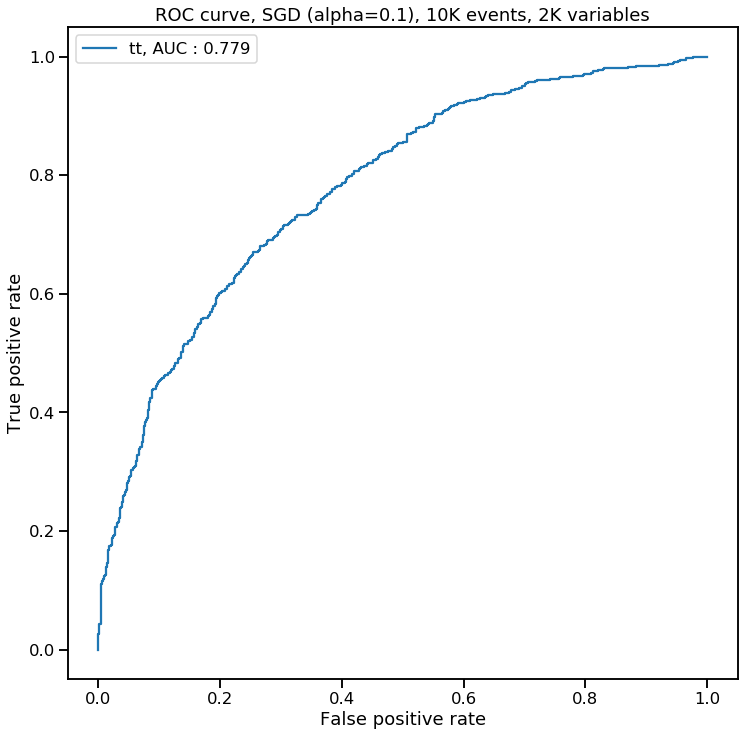

In [12]:

X_prob=ridge.predict(X_test)

figsize(12, 12)
import seaborn as sns
sns.set_context("talk")

Xpc=X_prob
ypc=y_test
roc=roc_curve(ypc, Xpc)
score=roc_auc_score(ypc, Xpc)
plot(roc[0], roc[1], label=f"tt, AUC : {score:.3f}")
    
legend()
xlabel("False positive rate")
ylabel("True positive rate")
title("ROC curve, SGD (alpha=0.1), 10K events, 2K variables")